In [39]:
import pandas as pd
import math
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("inflasi.csv", sep=",")
df

,Periode,Data Inflasi
0,Januari 2003,8.68
1,Februari 2003,7.60
2,Maret 2003,7.17
3,April 2003,7.62
4,Mei 2003,7.15
...,...,...
235,Agustus 2022,4.69
236,September 2022,5.95
237,Oktober 2022,5.71
238,November 2022,5.42


In [41]:
df_copy = df.copy()

last = len(df_copy.index)
jumlah_prediksi = 48

df_copy = df_copy.drop(index=df.index[last-jumlah_prediksi:last])

df_copy.reset_index(inplace=True, drop=True)
df_copy

,Periode,Data Inflasi
0,Januari 2003,8.68
1,Februari 2003,7.60
2,Maret 2003,7.17
3,April 2003,7.62
4,Mei 2003,7.15
...,...,...
187,Agustus 2018,3.20
188,September 2018,2.88
189,Oktober 2018,3.16
190,November 2018,3.23


In [42]:
df_copy

,Periode,Data Inflasi
0,Januari 2003,8.68
1,Februari 2003,7.60
2,Maret 2003,7.17
3,April 2003,7.62
4,Mei 2003,7.15
...,...,...
187,Agustus 2018,3.20
188,September 2018,2.88
189,Oktober 2018,3.16
190,November 2018,3.23


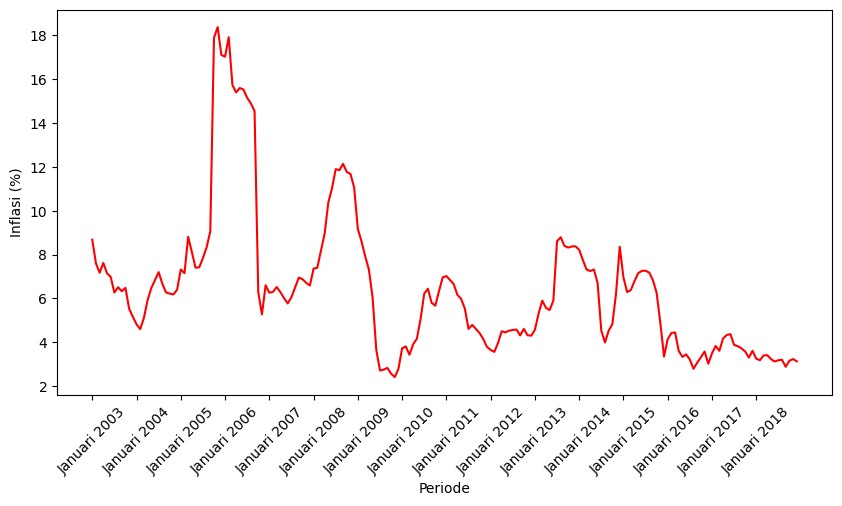

In [43]:
plt.figure(figsize=(10,5))
plt.plot(df_copy['Periode'], df_copy['Data Inflasi'], color='red')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.xticks(np.arange(0,len(df_copy.index)-1,12))
plt.show()

In [44]:
Di = df_copy['Data Inflasi']
Dmin = Di.min()
Dmax = Di.max()
U = [Dmin, Dmax]

print(U)

[2.41, 18.38]


In [45]:
# D1 = 0.41
# D2 = 0.62
# R = Dmax+D2 - (Dmin-D1)
R = Dmax - Dmin
n = Di.count()
K = 1 + (3.322 * math.log10(n))
L = (R/K)

print(R, n, K, L)

15.969999999999999 192 8.585126681753191 1.8601938669050277


In [46]:
himpunan_fuzzy = pd.DataFrame()
ui = []
Ai = []
batas_bawah = []
batas_atas = []
ui.append('u1')
Ai.append('A1')
batas_bawah.append(Dmin)
batas_atas.append(batas_bawah[0] + L)
rounded_up = math.ceil(K)

for i in range(1, rounded_up):
    ui.append('u'+str(i+1))
    Ai.append('A'+str(i+1))
    batas_bawah.append(batas_atas[i-1])
    batas_atas.append(batas_bawah[i] + L)

himpunan_fuzzy['ui'] = ui
himpunan_fuzzy['Ai'] = Ai
himpunan_fuzzy['batas bawah'] = batas_bawah
himpunan_fuzzy['batas atas'] = batas_atas

In [47]:
himpunan_fuzzy['mi'] = (himpunan_fuzzy['batas bawah'] + himpunan_fuzzy['batas atas'])/2

In [48]:
himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi
0,u1,A1,2.410000,4.270194,3.340097
1,u2,A2,4.270194,6.130388,5.200291
2,u3,A3,6.130388,7.990582,7.060485
3,u4,A4,7.990582,9.850775,8.920679
4,u5,A5,9.850775,11.710969,10.780872
5,u6,A6,11.710969,13.571163,12.641066
6,u7,A7,13.571163,15.431357,14.501260
7,u8,A8,15.431357,17.291551,16.361454
8,u9,A9,17.291551,19.151745,18.221648


In [49]:
# Misalkan df_copy dan himpunan_fuzzy telah didefinisikan sebelumnya

data_inflasi = df_copy['Data Inflasi']

# Menambah kolom frekuensi ke dalam himpunan_fuzzy
himpunan_fuzzy['frekuensi'] = 0

for i in data_inflasi:
    hf_copy = himpunan_fuzzy
    kondisi1 = hf_copy['batas bawah'] <= i
    kondisi2 = hf_copy['batas atas'] >= i
    dfAi = hf_copy.where(kondisi1 & kondisi2)
    dfAi = dfAi[~dfAi['ui'].isna()]
    
    # Menghitung jumlah data yang memenuhi kriteria
    jumlah_data = len(dfAi)
    
    # Mengupdate frekuensi langsung di dalam himpunan_fuzzy
    himpunan_fuzzy.loc[(himpunan_fuzzy['batas bawah'] <= i) & (himpunan_fuzzy['batas atas'] >= i), 'frekuensi'] += jumlah_data

# Sekarang himpunan_fuzzy sudah memiliki kolom frekuensi yang terisi

In [50]:
himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,4.270194,3.340097,51
1,u2,A2,4.270194,6.130388,5.200291,43
2,u3,A3,6.130388,7.990582,7.060485,61
3,u4,A4,7.990582,9.850775,8.920679,17
4,u5,A5,9.850775,11.710969,10.780872,4
5,u6,A6,11.710969,13.571163,12.641066,4
6,u7,A7,13.571163,15.431357,14.501260,4
7,u8,A8,15.431357,17.291551,16.361454,5
8,u9,A9,17.291551,19.151745,18.221648,3


In [51]:
hf_copy = himpunan_fuzzy.copy()
hf_copy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,4.270194,3.340097,51
1,u2,A2,4.270194,6.130388,5.200291,43
2,u3,A3,6.130388,7.990582,7.060485,61
3,u4,A4,7.990582,9.850775,8.920679,17
4,u5,A5,9.850775,11.710969,10.780872,4
5,u6,A6,11.710969,13.571163,12.641066,4
6,u7,A7,13.571163,15.431357,14.501260,4
7,u8,A8,15.431357,17.291551,16.361454,5
8,u9,A9,17.291551,19.151745,18.221648,3


In [52]:
# Hitung rata-rata frekuensi
rata_rata = himpunan_fuzzy['frekuensi'].sum() / K
rata_rata_frekuensi = round(rata_rata)
print(rata_rata_frekuensi)

22


In [53]:
rata_rata = rata_rata_frekuensi
frekuensi = hf_copy['frekuensi'] 
batas_atas = hf_copy['batas atas']
batas_bawah = hf_copy['batas bawah']
nilai_tengah = hf_copy['mi']

new_rows = []
new_ui = []
new_Ai = []

current_batas_bawah = Dmin  # Inisialisasi batas bawah

for i in range(len(frekuensi)):
    if frekuensi[i] > rata_rata:
        count = int(frekuensi[i] // rata_rata)
        remainder = frekuensi[i] % rata_rata
        dividen = count + 1
        
        for j in range(count):
            new_ui.append(f'u{len(new_ui) + 1}')
            new_Ai.append(f'A{len(new_Ai) + 1}')
            new_batas_bawah = current_batas_bawah
            new_batas_atas = new_batas_bawah + L / dividen
            new_rows.append([new_ui[-1], new_Ai[-1], new_batas_bawah, new_batas_atas, (new_batas_bawah + new_batas_atas) / 2, rata_rata])
            
            current_batas_bawah = new_batas_atas  # Perbarui batas bawah untuk baris berikutnya
        
        if remainder > 0:
            new_ui.append(f'u{len(new_ui) + 1}')
            new_Ai.append(f'A{len(new_Ai) + 1}')
            new_batas_bawah = current_batas_bawah
            new_batas_atas = new_batas_bawah + L / dividen
            new_rows.append([new_ui[-1], new_Ai[-1], new_batas_bawah, new_batas_atas, (new_batas_bawah + new_batas_atas) / 2, remainder])
            
            current_batas_bawah = new_batas_atas  # Perbarui batas bawah untuk baris berikutnya
    else:
        new_ui.append(f'u{len(new_ui) + 1}')
        new_Ai.append(f'A{len(new_Ai) + 1}')
        new_rows.append([new_ui[-1], new_Ai[-1], batas_bawah[i], batas_atas[i], nilai_tengah[i], frekuensi[i]])

# new_himpunan_fuzzy = pd.DataFrame({
#     'ui': pd.Series(new_ui),
#     'Ai': pd.Series(new_Ai),
#     'batas bawah': pd.Series(new_batas_baw),
#     'batas atas': pd.Series(new_batas_atas),
#     'mi': pd.Series(new_nilai_tengah),
#     'frekuensi': pd.Series(new_frekuensi)
# })

new_himpunan_fuzzy = pd.DataFrame(new_rows, columns=hf_copy.columns)


In [54]:
new_himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,3.030065,2.720032,22
1,u2,A2,3.030065,3.650129,3.340097,22
2,u3,A3,3.650129,4.270194,3.960162,7
3,u4,A4,4.270194,5.200291,4.735242,22
4,u5,A5,5.200291,6.130388,5.665339,21
5,u6,A6,6.130388,6.750452,6.440420,22
6,u7,A7,6.750452,7.370517,7.060485,22
7,u8,A8,7.370517,7.990582,7.680549,17
8,u9,A9,7.990582,9.850775,8.920679,17
9,u10,A10,9.850775,11.710969,10.780872,4


In [55]:
new_himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,3.030065,2.720032,22
1,u2,A2,3.030065,3.650129,3.340097,22
2,u3,A3,3.650129,4.270194,3.960162,7
3,u4,A4,4.270194,5.200291,4.735242,22
4,u5,A5,5.200291,6.130388,5.665339,21
5,u6,A6,6.130388,6.750452,6.440420,22
6,u7,A7,6.750452,7.370517,7.060485,22
7,u8,A8,7.370517,7.990582,7.680549,17
8,u9,A9,7.990582,9.850775,8.920679,17
9,u10,A10,9.850775,11.710969,10.780872,4


In [56]:
data_inflasi = df_copy['Data Inflasi']

data_fuzzy = []
for i in data_inflasi:
    copy_hf = new_himpunan_fuzzy
    kondisi1 = copy_hf['batas bawah'] <= i
    kondisi2 = copy_hf['batas atas'] >= i
    dfAi = copy_hf.where(kondisi1 & kondisi2)
    dfAi = dfAi[~dfAi['ui'].isna()]
    if not dfAi.empty:
        fuzzifikasi = dfAi['Ai'].iloc[0]
        data_fuzzy.append(fuzzifikasi)
    else:
        data_fuzzy.append(None)  # Atau berikan nilai default lainnya


df_copy['fuzzifikasi'] = data_fuzzy

In [57]:
df_copy

,Periode,Data Inflasi,fuzzifikasi
0,Januari 2003,8.68,A9
1,Februari 2003,7.60,A8
2,Maret 2003,7.17,A7
3,April 2003,7.62,A8
4,Mei 2003,7.15,A7
...,...,...,...
187,Agustus 2018,3.20,A2
188,September 2018,2.88,A1
189,Oktober 2018,3.16,A2
190,November 2018,3.23,A2


In [58]:
new_hf = new_himpunan_fuzzy.copy()
new_hf

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,3.030065,2.720032,22
1,u2,A2,3.030065,3.650129,3.340097,22
2,u3,A3,3.650129,4.270194,3.960162,7
3,u4,A4,4.270194,5.200291,4.735242,22
4,u5,A5,5.200291,6.130388,5.665339,21
5,u6,A6,6.130388,6.750452,6.440420,22
6,u7,A7,6.750452,7.370517,7.060485,22
7,u8,A8,7.370517,7.990582,7.680549,17
8,u9,A9,7.990582,9.850775,8.920679,17
9,u10,A10,9.850775,11.710969,10.780872,4


In [59]:
next_state = []
for x in range(0, len(df_copy.index)-1):
    Ns = df_copy['fuzzifikasi'].iloc[x+1]
    next_state.append(Ns)

df_copy['next state'] = pd.Series(next_state)

In [60]:
df_copy

,Periode,Data Inflasi,fuzzifikasi,next state
0,Januari 2003,8.68,A9,A8
1,Februari 2003,7.60,A8,A7
2,Maret 2003,7.17,A7,A8
3,April 2003,7.62,A8,A7
4,Mei 2003,7.15,A7,A7
...,...,...,...,...
187,Agustus 2018,3.20,A2,A1
188,September 2018,2.88,A1,A2
189,Oktober 2018,3.16,A2,A2
190,November 2018,3.23,A2,A2


In [61]:
# Membuat FLR 
data_fuzzifikasi = df_copy['fuzzifikasi']
jumlah_Ai = new_hf['Ai']
FLR = []
FLRG = []
i = 0
for i in range(len(data_fuzzifikasi) - 1):
    FLR.append(f"{data_fuzzifikasi[i]}->{data_fuzzifikasi[i+1]}")
    
df_copy['FLR'] = pd.Series(FLR)

In [62]:
# FLRG
dfFLRG = pd.DataFrame()
dfFLRG['Ai'] = new_hf['Ai']
dfFLRG['FLRG'] = ''
dfFLRG['Total'] = ''

df2 = df_copy[:-1]

for k in range(len(dfFLRG.index)):
    find_Ai = 'A' + str(k + 1)

    new = df2[df2['fuzzifikasi'].isin([find_Ai])]
    group = new['next state']
    group = group.to_numpy()

    if len(group) > 0:
        dfFLRG['FLRG'][k] = group

        total_jumlah = len(group)
        dfFLRG['Total'][k] = total_jumlah

In [63]:
dfFLRG

,Ai,FLRG,Total
0,A1,"[A1, A1, A1, A1, A1, A3, A2, A2, A2]",9
1,A2,"[A1, A3, A2, A3, A3, A2, A2, A2, A1, A2, A2, A...",27
2,A3,"[A3, A2, A3, A4, A3, A2, A4, A4, A4, A2, A4, A...",14
3,A4,"[A4, A4, A4, A5, A6, A4, A4, A4, A3, A4, A4, A...",27
4,A5,"[A4, A6, A6, A5, A5, A6, A2, A5, A6, A5, A4, A...",16
5,A6,"[A6, A6, A6, A5, A7, A6, A6, A6, A6, A7, A5, A...",29
6,A7,"[A8, A7, A6, A7, A6, A7, A9, A7, A6, A8, A5, A...",24
7,A8,"[A7, A7, A8, A8, A9, A9, A7, A7]",8
8,A9,"[A8, A9, A8, A9, A14, A9, A10, A9, A8, A9, A9,...",17
9,A10,"[A10, A11, A10, A9]",4


In [64]:
# Membuat LH dan RH
jumlah_Ai = new_hf['Ai']
LH = ['A' + str(i + 1) for i in range(len(jumlah_Ai))]
RH = LH

# Menghitung bobot dan pembobotan baris
initial_weights = []
row_weight_sums = []

for i, label1 in enumerate(LH):
    row_weight_sum = 0
    for j, label2 in enumerate(RH):
        condition = f"{LH[i]}->{RH[j]}"
        weight = sum(1 for relation in FLR if condition == relation)
        initial_weights.append(weight)
        row_weight_sum += weight
    row_weight_sums.append(row_weight_sum)

# Membuat matriks pembobotan
weight_matrix = np.array_split(initial_weights, len(LH))

# Mengubah matriks_pembobotan menjadi DataFrame
df_weight_matrix = pd.DataFrame(weight_matrix, columns=RH, index=LH)

In [65]:
# Menampilkan hasil
print("Matriks Pembobotan dalam DataFrame:")
df_weight_matrix

Matriks Pembobotan dalam DataFrame:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
A1,5,3,1,0,0,0,0,0,0,0,0,0,0,0
A2,4,18,5,0,0,0,0,0,0,0,0,0,0,0
A3,0,4,5,5,0,0,0,0,0,0,0,0,0,0
A4,0,2,3,18,2,2,0,0,0,0,0,0,0,0
A5,0,1,0,2,8,4,0,0,1,0,0,0,0,0
A6,0,0,0,2,5,15,6,0,1,0,0,0,0,0
A7,0,0,0,0,1,7,13,2,1,0,0,0,0,0
A8,0,0,0,0,0,0,4,2,2,0,0,0,0,0
A9,0,0,0,0,0,0,1,4,10,1,0,0,0,1
A10,0,0,0,0,0,0,0,0,1,2,1,0,0,0


In [66]:
normalized_weight_matrix = []

for i in range(len(LH)):
    row_normalized_weights = []
    for j in range(len(RH)):
        try:
            if weight_matrix[i][j] == 0:
                normalized_weight = 0
            else:
                normalized_weight = weight_matrix[i][j] / row_weight_sums[i]
                if math.isnan(normalized_weight):
                    normalized_weight = 0
        except:
            normalized_weight = 0
        row_normalized_weights.append(normalized_weight)
    normalized_weight_matrix.append(row_normalized_weights)

# Membuat DataFrame
df_normalized_weight_matrix = pd.DataFrame(normalized_weight_matrix, columns=LH, index=RH)

In [67]:
# Menampilkan DataFrame matriks terstandarisasi
df_normalized_weight_matrix

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
A1,0.555556,0.333333,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000
A2,0.148148,0.666667,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000
A3,0.000000,0.285714,0.357143,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000
A4,0.000000,0.074074,0.111111,0.666667,0.074074,0.074074,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000
A5,0.000000,0.062500,0.000000,0.125000,0.500000,0.250000,0.000000,0.000000,0.062500,0.000000,0.00,0.0,0.000000,0.000000
A6,0.000000,0.000000,0.000000,0.068966,0.172414,0.517241,0.206897,0.000000,0.034483,0.000000,0.00,0.0,0.000000,0.000000
A7,0.000000,0.000000,0.000000,0.000000,0.041667,0.291667,0.541667,0.083333,0.041667,0.000000,0.00,0.0,0.000000,0.000000
A8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,0.250000,0.000000,0.00,0.0,0.000000,0.000000
A9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.235294,0.588235,0.058824,0.00,0.0,0.000000,0.058824
A10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.500000,0.25,0.0,0.000000,0.000000


In [68]:
nilai_tengah = new_hf['mi']
nilai_prediksi = []

for i, x in enumerate(LH):
    hasil = 0
    for j, y in enumerate(RH):
        try:
            nilai = normalized_weight_matrix[i][j] * nilai_tengah[j]
            hasil += nilai
        except:
            nilai = 0
    nilai_prediksi.append(hasil)

dfFLRG['defuzzifikasi'] = nilai_prediksi

In [69]:
dfFLRG

,Ai,FLRG,Total,defuzzifikasi
0,A1,"[A1, A1, A1, A1, A1, A3, A2, A2, A2]",9,3.064513
1,A2,"[A1, A3, A2, A3, A3, A2, A2, A2, A1, A2, A2, A...",27,3.363062
2,A3,"[A3, A2, A3, A4, A3, A2, A4, A4, A4, A2, A4, A...",14,4.059815
3,A4,"[A4, A4, A4, A5, A6, A4, A4, A4, A3, A4, A4, A...",27,4.740984
4,A5,"[A4, A6, A6, A5, A5, A6, A2, A5, A6, A5, A4, A...",16,5.800978
5,A6,"[A6, A6, A6, A5, A7, A6, A6, A6, A6, A7, A5, A...",29,6.403002
6,A7,"[A8, A7, A6, A7, A6, A7, A9, A7, A6, A8, A5, A...",24,6.950682
7,A8,"[A7, A7, A8, A8, A9, A9, A7, A7]",8,7.680549
8,A9,"[A8, A9, A8, A9, A14, A9, A10, A9, A8, A9, A9,...",17,9.175999
9,A10,"[A10, A11, A10, A9]",4,10.780872


In [70]:
df2 = df_copy.copy()
df2

,Periode,Data Inflasi,fuzzifikasi,next state,FLR
0,Januari 2003,8.68,A9,A8,A9->A8
1,Februari 2003,7.60,A8,A7,A8->A7
2,Maret 2003,7.17,A7,A8,A7->A8
3,April 2003,7.62,A8,A7,A8->A7
4,Mei 2003,7.15,A7,A7,A7->A7
...,...,...,...,...,...
187,Agustus 2018,3.20,A2,A1,A2->A1
188,September 2018,2.88,A1,A2,A1->A2
189,Oktober 2018,3.16,A2,A2,A2->A2
190,November 2018,3.23,A2,A2,A2->A2


In [71]:
df2['nilai prediksi'] = ''

for x in range(len(new_hf.index)):
    ai = new_hf['Ai'].iloc[x]  #menggunakan iloc untuk mengakses baris berdasarkan indeks
    listAi = df2[df2['fuzzifikasi'] == ai]
    n_prediksi = dfFLRG['defuzzifikasi'].iloc[x]  #menggunakan iloc untuk mengakses nilai berdasarkan indeks

    if len(listAi) > 0: #memastikan listAi tidak kosong
        idx = listAi.index
        for y in idx:
            df2.at[y+1, 'nilai prediksi'] = n_prediksi

In [72]:
df2

,Periode,Data Inflasi,fuzzifikasi,next state,FLR,nilai prediksi
0,Januari 2003,8.68,A9,A8,A9->A8,
1,Februari 2003,7.60,A8,A7,A8->A7,9.175999
2,Maret 2003,7.17,A7,A8,A7->A8,7.680549
3,April 2003,7.62,A8,A7,A8->A7,6.950682
4,Mei 2003,7.15,A7,A7,A7->A7,7.680549
...,...,...,...,...,...,...
188,September 2018,2.88,A1,A2,A1->A2,3.363062
189,Oktober 2018,3.16,A2,A2,A2->A2,3.064513
190,November 2018,3.23,A2,A2,A2->A2,3.363062
191,Desember 2018,3.13,A2,NaN,NaN,3.363062


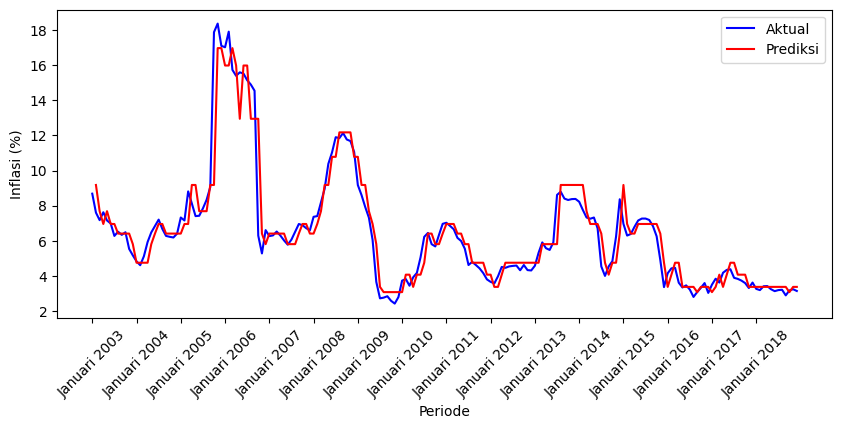

In [73]:
# Buat salinan DataFrame
df2_copy = df2.copy()
df2_copy = df2_copy.drop(index=df2_copy.index[-1])
# df2_copy = df2_copy[df2_copy['nilai prediksi'] != '']

df2_copy.reset_index(inplace=True, drop=True)


# Plot data
plt.figure(figsize=(10, 4))
plt.plot(df2_copy['Periode'], df2_copy['Data Inflasi'], color='blue', label='Aktual')
plt.plot(df2_copy['Periode'][1:], df2_copy['nilai prediksi'][1:], color='red', label='Prediksi')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(df2_copy.index), 12))
plt.legend()
plt.show()

In [74]:
y_actual = df2_copy['Data Inflasi'][1:-1].to_numpy()
y_predict = df2_copy['nilai prediksi'][1:-1].to_numpy()

MAPE = mean_absolute_percentage_error(y_actual, y_predict)
print("MAPE =", MAPE * 100)

MAPE = 9.853567761779066


In [75]:
last_index = len(df2.index)
df_predict_next = df2

for f in range(jumlah_prediksi-1):
    nilaiPred = df_predict_next['nilai prediksi'][last_index-1+f]

    copy_hf = new_himpunan_fuzzy
    kondisi1 = copy_hf['batas bawah'] <= nilaiPred
    kondisi2 = copy_hf['batas atas'] >= nilaiPred
    dfAi = copy_hf.where(kondisi1 & kondisi2)
    dfAi = dfAi[~dfAi['ui'].isna()]
    fuzzifikasi = dfAi['Ai'].iloc[0]
    df_predict_next.at[last_index + f-1, 'fuzzifikasi'] = fuzzifikasi

    nP = dfFLRG['defuzzifikasi'][dfFLRG['Ai'] == fuzzifikasi]
    df_predict_next.at[last_index+f, 'nilai prediksi'] = nP.values[0]


In [76]:
df_predict_next

,Periode,Data Inflasi,fuzzifikasi,next state,FLR,nilai prediksi
0,Januari 2003,8.68,A9,A8,A9->A8,
1,Februari 2003,7.60,A8,A7,A8->A7,9.175999
2,Maret 2003,7.17,A7,A8,A7->A8,7.680549
3,April 2003,7.62,A8,A7,A8->A7,6.950682
4,Mei 2003,7.15,A7,A7,A7->A7,7.680549
...,...,...,...,...,...,...
235,NaN,NaN,A2,NaN,NaN,3.363062
236,NaN,NaN,A2,NaN,NaN,3.363062
237,NaN,NaN,A2,NaN,NaN,3.363062
238,NaN,NaN,A2,NaN,NaN,3.363062


In [77]:
df_predict_next[len(df_predict_next.index)-jumlah_prediksi:]

,Periode,Data Inflasi,fuzzifikasi,next state,FLR,nilai prediksi
192,NaN,NaN,A2,NaN,NaN,3.363062
193,NaN,NaN,A2,NaN,NaN,3.363062
194,NaN,NaN,A2,NaN,NaN,3.363062
195,NaN,NaN,A2,NaN,NaN,3.363062
196,NaN,NaN,A2,NaN,NaN,3.363062
197,NaN,NaN,A2,NaN,NaN,3.363062
198,NaN,NaN,A2,NaN,NaN,3.363062
199,NaN,NaN,A2,NaN,NaN,3.363062
200,NaN,NaN,A2,NaN,NaN,3.363062
201,NaN,NaN,A2,NaN,NaN,3.363062


In [78]:
df_result = df.copy()
df_result['nilai prediksi'] = df2['nilai prediksi']
df_result

,Periode,Data Inflasi,nilai prediksi
0,Januari 2003,8.68,
1,Februari 2003,7.60,9.175999
2,Maret 2003,7.17,7.680549
3,April 2003,7.62,6.950682
4,Mei 2003,7.15,7.680549
...,...,...,...
235,Agustus 2022,4.69,3.363062
236,September 2022,5.95,3.363062
237,Oktober 2022,5.71,3.363062
238,November 2022,5.42,3.363062


In [79]:
df_result[len(df_result.index)-jumlah_prediksi:]

,Periode,Data Inflasi,nilai prediksi
192,Januari 2019,2.82,3.363062
193,Februari 2019,2.57,3.363062
194,Maret 2019,2.48,3.363062
195,April 2019,2.83,3.363062
196,Mei 2019,3.32,3.363062
197,Juni 2019,3.28,3.363062
198,Juli 2019,3.32,3.363062
199,Agustus 2019,3.49,3.363062
200,September 2019,3.39,3.363062
201,Oktober 2019,3.13,3.363062


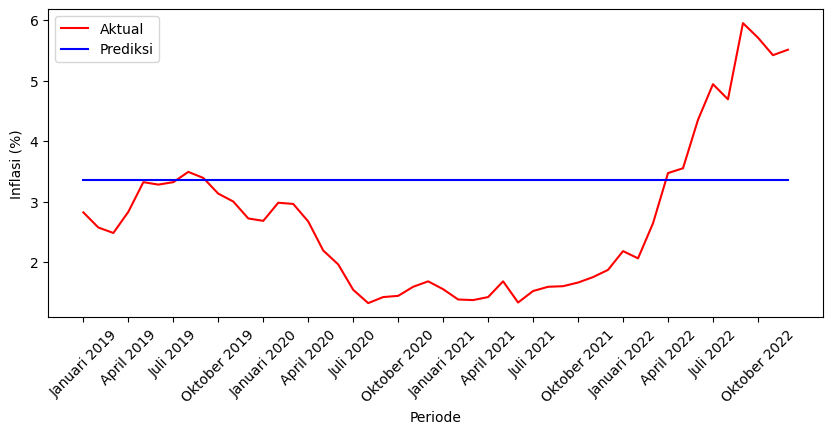

In [80]:
plt.figure(figsize=(10,4))
plt.plot(df_result['Periode'][len(df_result.index)-jumlah_prediksi:], df_result['Data Inflasi'][len(df_result.index)-jumlah_prediksi:], color='red', label='Aktual')
plt.plot(df_result['Periode'][len(df_result.index)-jumlah_prediksi:], df_result['nilai prediksi'][len(df_result.index)-jumlah_prediksi:], color='blue', label='Prediksi')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.xticks(np.arange(0,jumlah_prediksi,3))
plt.legend()
plt.show()

In [81]:
# MAPE pred
# df_result.dropna(subset=['nilai prediksi'], inplace=True)
y_actualpred = df_result['Data Inflasi'][last-jumlah_prediksi:len(df_result.index)].to_numpy()
y_predictpred = df_result['nilai prediksi'][last-jumlah_prediksi:len(df_result.index)].to_numpy()

# MAPE
MAPE2 = mean_absolute_percentage_error(y_actualpred, y_predictpred)

print("Hasil MAPE untuk memprediksi data",jumlah_prediksi,"periode ke depan")
print("MAPE = ",MAPE2*100)

Hasil MAPE untuk memprediksi data 48 periode ke depan
MAPE =  60.97643522205782


In [82]:
# MAPE all
y_actual2 = df_result['Data Inflasi'][1:len(df_result.index)].to_numpy()
# print(y_actual2)
y_predict2 = df_result['nilai prediksi'][1:len(df_result.index)].to_numpy()
# MAPE
MAPE3 = mean_absolute_percentage_error(y_actual2, y_predict2)

print("MAPE = ",MAPE3*100)

MAPE =  20.110848723615945
